<a href="https://colab.research.google.com/github/isa-ulisboa/greends-pml/blob/main/tests/teste_latex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course on Pratical Machine Learning

Masters in Green Data Science, ISA/ULisboa, 2022-2023

Instructor: Manuel Campagnolo mlc@isa.ulisboa.pt

# Introduction and some basic concepts in Machine Learning (ML)

In this course we are dealing with data sets of *labeled examples*. Examples can be scalar numbers, rows of tabular data, images, etc. For tabular data, we refer the to columns as *explanatory variables* (sometimes also called *independent* or *descriptive* variables).

Labels can be categorial, ordinal or continuous. Labels can be refered to as the *response variable* (or *dependent* variable). They are also called *targets*. Typically, we the problems are called:
1. *Regression problems*, when the labels are continuous. 
2. *Classification problems*, when the labels are categorial.

The distinction is not always clear. Some problems can be considered either as regression or classification problems. 

Given a ML problem, that is a set of labeled examples, the goal is to build a function $f$ that maps examples to labels, or in other words, that predicts the label from the example.

We call *predictions* or *predicted values* to the output of $f$, and *observations* or *actual values* to the actual labels.




## Models and parameters


More formally, if $E$ is the set of examples and $L$ is a set that includes the labels, then what we call the *model* is a family of functions $f_{\rm \bf w}$ that depends on a set of parameters ${\rm \bf w}$: $$f_{\rm \bf w}: E → L.$$

It can be more convenient to express the function as depending on the parameters ${\rm \bf w}$ as well as the example ${\rm \bf x}$. The predicted label $\hat{y}$ for example ${\rm \bf x}$ is then given by:

$$\hat{y}=f_{\rm \bf w}({\rm \bf x})= f({\rm \bf x}; {\rm \bf w}).$$

ML practicioners use an enormous variety of models, depending on the problem at hand and on the available computational resources to train the model. Models include convolucional neural networks (CNN) for image classification (resnet and other kind of CNNs), neural networks (NN) for classification of tabular data, linear regression models, decision and regression trees, random forest and other ensemble models, among many other models.

### Example of a simple model (simple linear regression)

Suppose that our examples are scalar numbers $x_1,\dots, x_n$ and the labels are continuous labels $y_1, \dots, y_n$. We call $x$ the explanatory variable and $y$ the response variable. 

Let's consider the simple linear regression model:
$f_{\rm a,b}(x)= a \, x + b.$

The model parameters are ${\rm \bf w}=(a,b)$ and the predicted values are given by$\\[1em]$ 
$$\hat{y}=f(x; {\rm a,b})=a\, x + b.$$

The observed or actual label values are the $y_1, \dots, y_n$, and the predicted label values are the $\hat{y}_1,\dots,\hat{y}_n$.



### Example of a simple model (quadratic regression)

In notebook [Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb](Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb), a similar simple example was discussed. The only difference was that the model $f_{\rm a,b,c}$ was quadratic instead of linear: 

$$f_{\rm a,b,c}(x)= f(x;a,b,c)= a \, x^2 + b \, x + c.$$

In the illustration below, the observed (actual) values are plotted in blue, and the values preditted by the model for a fixed set of parameters $a=3, b=2, c=1$ are plotted in red.

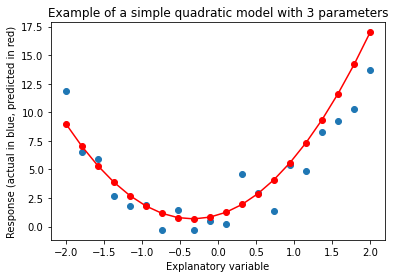

In [12]:
# example from Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb
import numpy as np
import torch
import matplotlib.pyplot as plt
np.random.seed(42)
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)
# create synthetic examples (x) and labels (y), and calculate predictions
x = torch.linspace(-2, 2, steps=20)[:,None]
def f(x): return 3*x**2 + 2*x + 1
y = add_noise(f(x), 0.15, 1.5)
ypred=f(x)
# plot 
plt.scatter(x,y);
plt.scatter(x,ypred,color='red');
plt.title("Example of a simple quadratic model with 3 parameters")
plt.xlabel("Explanatory variable")
plt.ylabel("Response (actual in blue, predicted in red)")
plt.plot(x, f(x), 'red')
plt.show()

## Loss function

In ML, it is usual to call *loss* to the **dissimilarity** between actual and predicted label values for a *set * of labeled examples.

Let ${\rm \bf x}_1, \dots , {\rm \bf x}_n$ be a set of examples with labels $y_1, \dots , y_n$. Let $f_{\rm \bf w}$ be our model. Therefore, the predicted labels are 

$$\hat{y}_1=f_{\rm \bf w}({\rm \bf x}_1), \dots, \hat{y}_n=f_{\rm \bf w}({\rm \bf x}_n).$$

The loss over that set of examples is some dissimilarity measure between the actual labels $y_1, \dots , y_n$ and the predicted labels $\hat{y}_1, \dots , \hat{y}_n$.



### Example (simple linear regression)



For the linear regression example, the response variable is continuous. We wish to measure the dissimilarity between the set of actual label values $y_1, \dots , y_n$  and the set of values predicted by the model 
$f_{\rm a,b}(x)= a \, x + b$: 

$$\hat{y}_1=a\, x_1+ b, \dots, \hat{y}_n=a\, x_n+ b.$$

Since the response is continuous, it makes sense to use a function like:

1. Mean absolute error (MAE), given by $\sum_{i=1}^n |y_i-\hat{y}_i|$; or

2. Mean square error (MSE), given by $\frac{1}{n}\sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2$; notice that this function will penalize much more large differences $y_i-\hat{y}_i$ than MAE does; or

3. Root mean square error (RMSE), given by $\sqrt{\frac{1}{n}\sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2}$.

### Example (quadratic regression)

In notebook [Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb](Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb), loss was given by MAE, i.e. $\sum_{i=1}^n |y_i-\hat{y}_i|$.

In [ ]:
def mae(preds, acts): return (torch.abs(preds-acts)).mean()

The notebook includes code to interactively change the parameter values and compute the MAE loss function for the data set.

In [21]:
from fastai.basics import * # necessary for partial
def quad(a, b, c, x): return a*x**2 + b*x + c
def mk_quad(a,b,c): return partial(quad, a,b,c)
def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)
# interactive plot
from ipywidgets import interact
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

## Dissimilarity measures to define *loss*


To define loss, we then need to choose an appropriate dissimilarity measure between a set of actual and predicted labels. The choice depends on the type of problem, and while MAE or RMSE are adequate for *regression* problems, other kind of dissimilarities are used for *classification* problems.

Dissimilarity is the opposite to 
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics


In [29]:
x = torch.randn(4,5) # rows= individuals; columns=classes; values are supposed to be the model response for each individual and class
y = x.argmax(dim=1) # return the index of the column with the maximum value; the output has length 4=number of rows of x
error_rate(x,y) # error_rate is zero because y was computed to be precisely the label that has higher model response
print(x,y)



tensor([[ 0.7015,  0.5984,  0.6381, -0.7208,  0.8877],
        [ 1.0278, -0.1768,  1.8812,  0.2493, -0.8656],
        [-0.6898,  0.8793, -1.0885, -0.0538, -0.5269],
        [-0.0419, -0.6171, -0.0337, -2.6050,  2.0542]]) tensor([4, 2, 1, 4])


### Loss functions for regression problems



### Loss functions for classification problems



## ML as an optimization problem



Now, we can define a ML problem as a optimization problem. Given:
1.  a set of examples  ${\rm \bf x}_1, \dots , {\rm \bf x}_n$  with labels $y_1, \dots , y_n$,
2. a model $f_{\rm \bf w}$,
3. a *loss* function $\mathcal{L}$,

the goal is to determine the optimal set of parameters ${\rm \bf w}$ that minimize the loss $\mathcal{L}$ over that set of examples.

Examples + labels

Examples cab be images, rows in tabular data, text...
Labels can be categorial, ordinal or continuous

If labels are continuous, the problem is typically a regression problem
....

Ml: map an example to the set of labels to predict the label from the example

Ml is done through a function f_w: X to Y, where w are a set of parameters of the function.

More conveniently the predicted label is given by, y=f(x;w)

F can be a neural network, a CNN, a regression model, a decision tree, an ensemble of other models, et

Loss  for a set of examples x1, x2, ... and a set of weights w, the loss l(w) is a new function that measures the dissimilarity between  predicted labels f(x1;w)... And the actual labels  y1,....

Examples of loss functions
For régression
For classification

Ml as an optimization problem:
Determine w to minimize loss

In some very simple  cases the optimum can be determined analytacally. In general, it can be searched by heuristic methods.

One of the heuristic methods is gradient descent that uses a learning rate.

Examples
1. Quadratic function
Xs are just scalars
Y are continuous (regression problem)
F_w is f(x;a,b,c)
Loss is mãe or rmse
In this case the best set of weights can be determined analytacally
In alternative one can use gradient descent

2. Perceptron (no sigmoid) = mlr
X are vectors , after preprocessing
Y are 0 or 1 (regression or classification)
Fw is S(X1 w1+....)
Loss is ...
In this case the problem 8s equivalent to least square mlr, and has an analital solution

3. Perceptron with sigmoid output


4 FC nn with hidden layers

\begin{align}
        \mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^n a_i b_i.
    \end{align}
